In [4]:
import xgboost as xgb

In [5]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target'] = y_label 
cancer_df.head(3)





,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [6]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


In [7]:
from sklearn.model_selection import train_test_split


X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156, stratify=y_label)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)
print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)


(455, 30) (114, 30)
(409, 30) (46, 30)


In [8]:
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)


In [9]:
params = {
    'max_depth': 3,
    'eta': 0.05,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

num_rounds = 400

In [10]:
eval_list = [(dtr, 'train'), (dval, 'eval')] 
xgb_model = xgb.train(params=params, dtrain=dtr, num_boost_round=num_rounds, early_stopping_rounds=50, evals=eval_list)


[0]	train-logloss:0.61930	eval-logloss:0.62152
[1]	train-logloss:0.58209	eval-logloss:0.58858
[2]	train-logloss:0.54842	eval-logloss:0.55988
[3]	train-logloss:0.51701	eval-logloss:0.53168
[4]	train-logloss:0.48832	eval-logloss:0.50598
[5]	train-logloss:0.46256	eval-logloss:0.48101
[6]	train-logloss:0.43833	eval-logloss:0.46024
[7]	train-logloss:0.41519	eval-logloss:0.43972
[8]	train-logloss:0.39460	eval-logloss:0.42200
[9]	train-logloss:0.37466	eval-logloss:0.40455
[10]	train-logloss:0.35615	eval-logloss:0.38850
[11]	train-logloss:0.33960	eval-logloss:0.37446
[12]	train-logloss:0.32322	eval-logloss:0.36050
[13]	train-logloss:0.30793	eval-logloss:0.34761
[14]	train-logloss:0.29429	eval-logloss:0.33378
[15]	train-logloss:0.28118	eval-logloss:0.32369
[16]	train-logloss:0.26926	eval-logloss:0.31213
[17]	train-logloss:0.25785	eval-logloss:0.30274
[18]	train-logloss:0.24716	eval-logloss:0.29405
[19]	train-logloss:0.23723	eval-logloss:0.28693
[20]	train-logloss:0.22824	eval-logloss:0.27875
[2

In [14]:
import numpy as np

pred_probs = xgb_model.predict(dtest) 
print(type(pred_probs))
print(pred_probs.shape)
print(np.round(pred_probs[:10], 3))

preds = [1 if x>0.5 else 0 for x in pred_probs]
print(preds[:10])


<class 'numpy.ndarray'>
(114,)
[0.002 0.998 0.994 0.999 0.979 0.974 0.994 0.999 0.999 0.998]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}, AUC: {roc_auc:.4f}')






In [16]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[41  1]
 [ 1 71]]
정확도: 0.9825, 정밀도: 0.9861, 재현율: 0.9861, F1: 0.9861, AUC: 0.9940


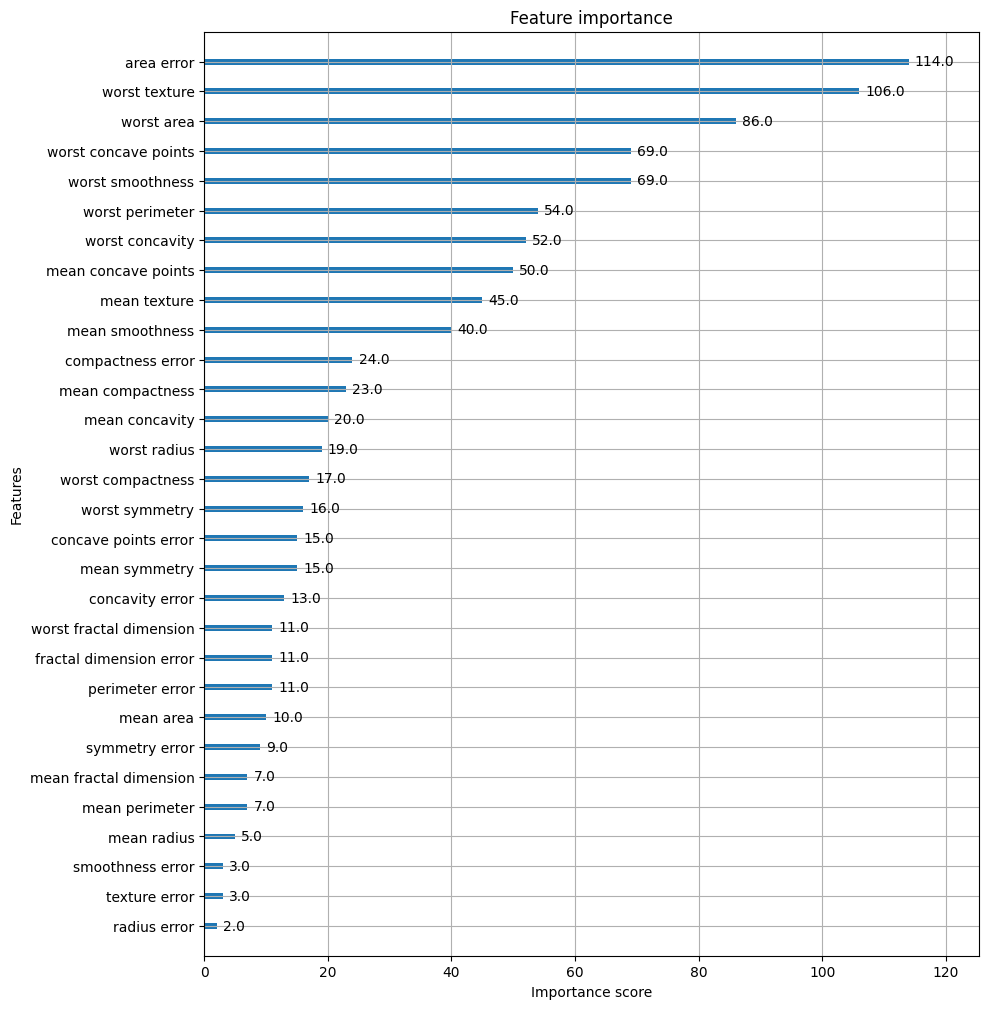

In [17]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)
plt.show()





In [19]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [20]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[41  1]
 [ 1 71]]
정확도: 0.9825, 정밀도: 0.9861, 재현율: 0.9861, F1: 0.9861, AUC: 0.9950


In [23]:
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, early_stopping_rounds=100, eval_metric='logloss')
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train,  eval_set=evals, verbose=True)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.57944
[1]	validation_0-logloss:0.51714
[2]	validation_0-logloss:0.46564
[3]	validation_0-logloss:0.42188
[4]	validation_0-logloss:0.38254
[5]	validation_0-logloss:0.34981
[6]	validation_0-logloss:0.31954
[7]	validation_0-logloss:0.29478
[8]	validation_0-logloss:0.27159
[9]	validation_0-logloss:0.25140
[10]	validation_0-logloss:0.23226
[11]	validation_0-logloss:0.21649
[12]	validation_0-logloss:0.20169
[13]	validation_0-logloss:0.18903
[14]	validation_0-logloss:0.17777
[15]	validation_0-logloss:0.16795
[16]	validation_0-logloss:0.15899
[17]	validation_0-logloss:0.15128
[18]	validation_0-logloss:0.14374
[19]	validation_0-logloss:0.13778
[20]	validation_0-logloss:0.13249
[21]	validation_0-logloss:0.12669
[22]	validation_0-logloss:0.12158
[23]	validation_0-logloss:0.11861
[24]	validation_0-logloss:0.11392
[25]	validation_0-logloss:0.11069
[26]	validation_0-logloss:0.10878
[27]	validation_0-logloss:0.10627
[28]	validation_0-logloss:0.10417
[29]	validation_0-loglos

In [24]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차 행렬
[[41  1]
 [ 0 72]]
정확도: 0.9912, 정밀도: 0.9863, 재현율: 1.0000, F1: 0.9931, AUC: 0.9944


In [25]:
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, early_stopping_rounds=10, eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train,  eval_set=evals, verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)





[0]	validation_0-logloss:0.57944
[1]	validation_0-logloss:0.51714
[2]	validation_0-logloss:0.46564
[3]	validation_0-logloss:0.42188
[4]	validation_0-logloss:0.38254
[5]	validation_0-logloss:0.34981
[6]	validation_0-logloss:0.31954
[7]	validation_0-logloss:0.29478
[8]	validation_0-logloss:0.27159
[9]	validation_0-logloss:0.25140
[10]	validation_0-logloss:0.23226
[11]	validation_0-logloss:0.21649
[12]	validation_0-logloss:0.20169
[13]	validation_0-logloss:0.18903
[14]	validation_0-logloss:0.17777
[15]	validation_0-logloss:0.16795
[16]	validation_0-logloss:0.15899
[17]	validation_0-logloss:0.15128
[18]	validation_0-logloss:0.14374
[19]	validation_0-logloss:0.13778
[20]	validation_0-logloss:0.13249
[21]	validation_0-logloss:0.12669
[22]	validation_0-logloss:0.12158
[23]	validation_0-logloss:0.11861
[24]	validation_0-logloss:0.11392
[25]	validation_0-logloss:0.11069
[26]	validation_0-logloss:0.10878
[27]	validation_0-logloss:0.10627
[28]	validation_0-logloss:0.10417
[29]	validation_0-loglos

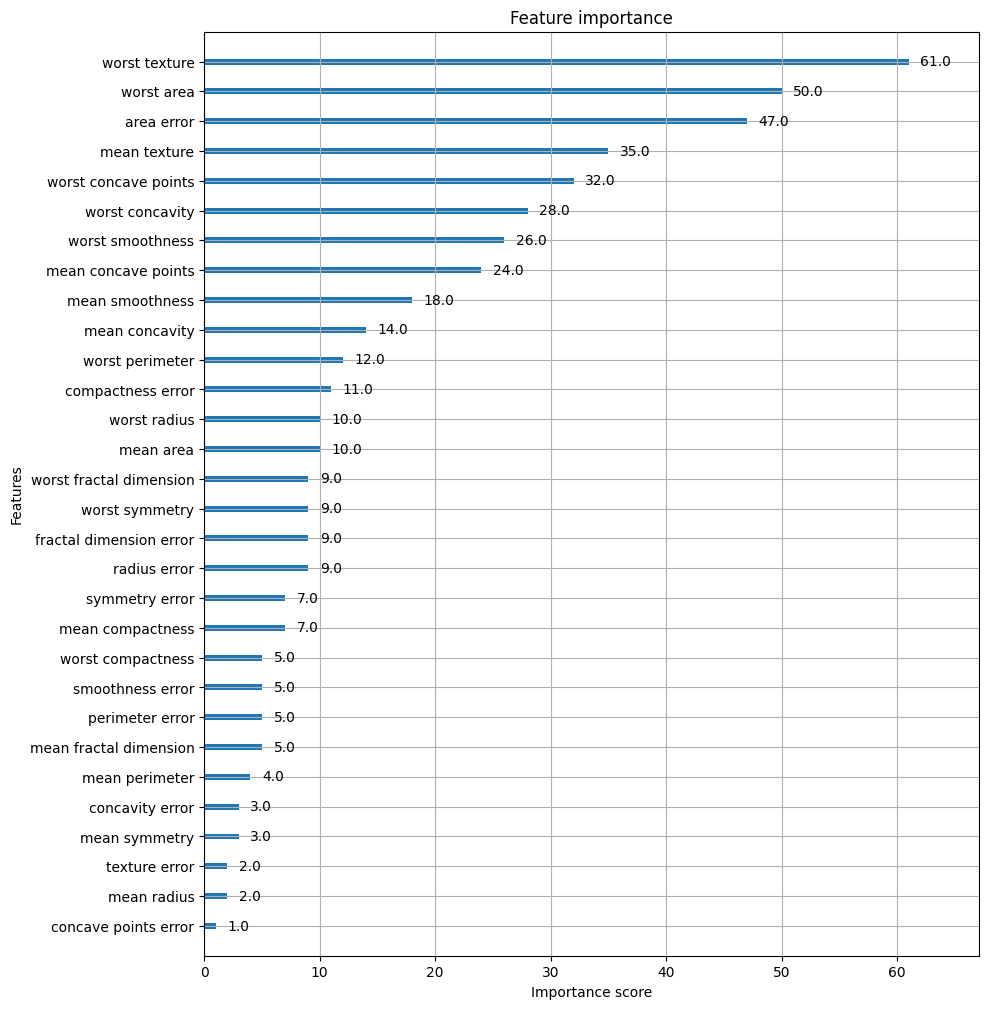

In [26]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_wrapper, ax=ax)
plt.show()



